In [168]:
import numpy as np
import matplotlib.pyplot as plt

L_sun = 3.828e26 # quater of the suns light gets through
R_Cu = 0.5
AU = 1.496e11
delta = 3e-3
c_oak = 2400000
DeltaT = 300 - 25 # 300 flash point of oak - 25 degree italian weather
rho_oak = 704 + (930-704)/2
A_mirror = 0.3*0.3
dB_air = 0.5 # dB per km
R_ship = 0.3

def N(t_ignite, d_ship):
    attenuation = 10 ** -(dB_air * (d_ship/1000) /10)
    return (4 * np.pi * c_oak * delta * DeltaT * (AU) ** 2) / (L_sun * attenuation * A_mirror * t_ignite * R_Cu * (1-R_ship))

def t_ig(d_ship, N):
    return rho_oak * delta * c_oak * DeltaT / ((L_sun / (4 * np.pi * AU**2)) * R_Cu)


79.0 mirrors


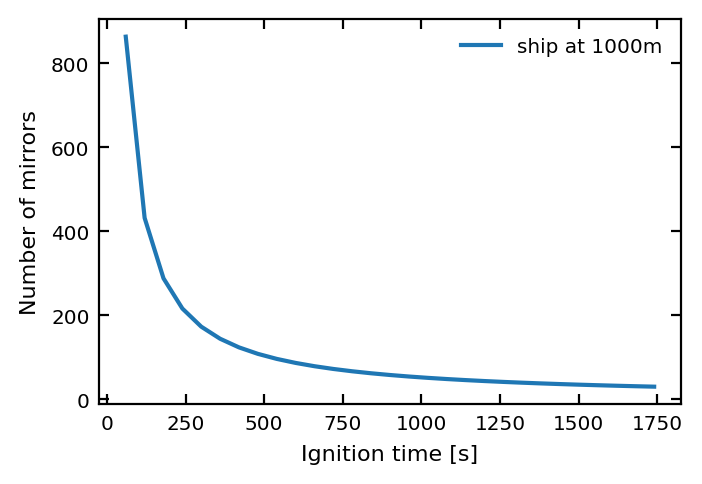

In [170]:
d_ship=1000
fontsize=8
t_ignites = np.arange(1, 30, 1)*60
Ns = N(t_ignites, d_ship)

plt.figure(figsize=[3*1.25,2*1.25], dpi=200)
print(round(Ns[10],0), "mirrors")
plt.plot(t_ignites, N(t_ignites, d_ship), label=f"ship at {d_ship}m")
#plt.yscale("log")
#plt.xscale("log")
#plt.vlines()
plt.xlabel("Ignition time [s]", fontsize=fontsize)
plt.ylabel("Number of mirrors", fontsize=fontsize)
plt.tick_params(axis='both', which='major', direction="in", labelsize=fontsize*0.9, top=True, right=True)
plt.tick_params(axis='both', which='minor', direction="in", top=True, right=True)
plt.legend(frameon=False, fontsize=fontsize*0.9)    


ValueError: x and y must have same first dimension, but have shapes (450,) and (1,)

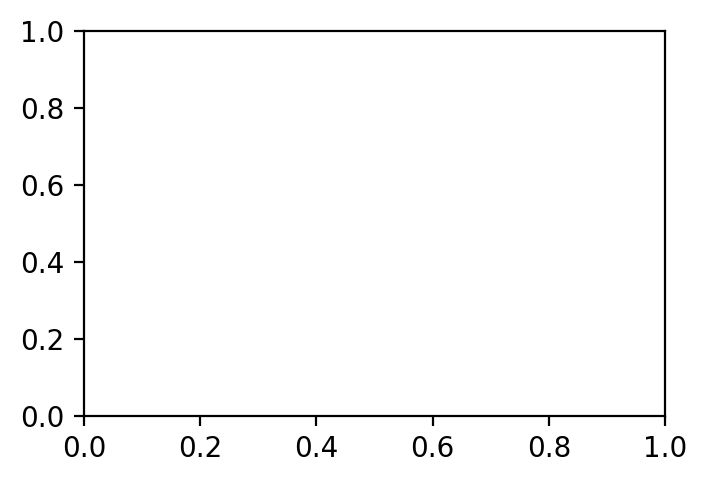

In [98]:
N_mirrors=1000
fontsize=8
distances = np.arange(50, 500, 1)

plt.figure(figsize=[3*1.25,2*1.25], dpi=200)
plt.plot(distances, t_ig(distances, 300), label=f"{N_mirrors} mirrors")
#plt.yscale("log")
#plt.xscale("log")
#plt.vlines()
plt.xlabel("Ignition time [s]", fontsize=fontsize)
plt.ylabel("Number of mirrors", fontsize=fontsize)
plt.tick_params(axis='both', which='major', direction="in", labelsize=fontsize*0.9, top=True, right=True)
plt.tick_params(axis='both', which='minor', direction="in", top=True, right=True)
plt.legend(frameon=False, fontsize=fontsize*0.9)